In [1]:
# merge and plot nFR and SE difference
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

nfr = pd.read_csv('../result/Anti/nFR/p_value.tsv', sep='\t', index_col=0, header=0)
se = pd.read_csv('../result/Anti/SE/p_value.tsv', sep='\t', index_col=0, header=0)
p_cutoff = 0.05


In [2]:
nfr[nfr>=p_cutoff] = 2
se[se>=p_cutoff] = 2

nfr[nfr<0.05] = 1
se[se<0.05] = 1

nfr[nfr==2] = 0
se[se==2] = 0


In [3]:

nfr.dropna(how='all', inplace=True)
se.dropna(how='all', inplace=True)

new_ids = set(nfr.index).union(set(se.index))

new_row = pd.DataFrame(columns=nfr.columns, index=list(new_ids.difference(set(nfr.index))))
nfr = pd.concat([nfr, new_row], ignore_index=False)

new_row = pd.DataFrame(columns=nfr.columns, index=list(new_ids.difference(set(se.index))))
se = pd.concat([se, new_row], ignore_index=False)

nfr.fillna(np.nan, inplace=True)
se.fillna(np.nan, inplace=True)
ids = sorted(list(new_ids))

<Figure size 2000x5000 with 0 Axes>

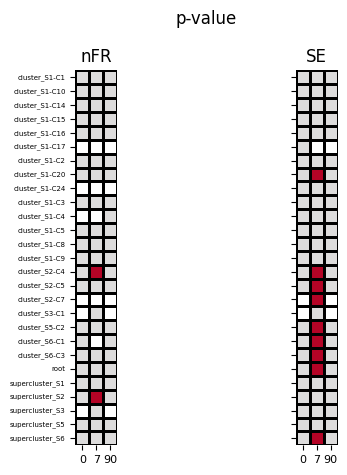

In [4]:
plt.figure(figsize=(20, 50))
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns_plot = sns.heatmap(nfr.loc[ids, ], ax=ax1,square=True, linecolor='black', cbar=False, xticklabels=True, yticklabels=True, linewidths=1, cmap="coolwarm", vmin=-1, center=0, vmax=1)
sns_plot.tick_params(labelsize=8)
ax1.set_title('nFR')
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=5)
sns_plot = sns.heatmap(se.loc[ids, ], ax=ax2, square=True, linecolor='black', cbar=False, xticklabels=True, yticklabels=True, linewidths=1, cmap="coolwarm", vmin=-1, center=0, vmax=1)
sns_plot.tick_params(labelsize=8)
ax2.set_title('SE')
fig.suptitle('p-value')
plt.subplots_adjust(hspace=0.1)
plt.tight_layout()
plt.savefig('../result/Anti/p_value.pdf', dpi=300, format='pdf')
plt.show()